In [89]:
import pandas as pd

df = pd.read_csv('Satellite_Australia_Simulation_Log.csv')

In [90]:
len(df.columns.tolist())

7211

In [91]:
df['LEO101_Sydney_Access'].value_counts()


LEO101_Sydney_Access
0    5
1    1
Name: count, dtype: int64

In [92]:
df['LEO101_Sydney_Access'].fillna(False).any()

True

In [93]:
df['LEO1_Sydney_Access'].value_counts()


LEO1_Sydney_Access
0    6
Name: count, dtype: int64

In [94]:
df['LEO1_Sydney_Access'].fillna(False).any()

False

In [95]:
import pandas as pd
import re

# Step 1: Drop columns that are all zeros or all NaN
df = df.drop(columns=[col for col in df.columns if ((df[col] == 0) | (df[col].isna())).all()])

# Step 2: Get max satellite ID from column names
sat_ids = [int(match.group(1)) for col in df.columns if (match := re.match(r'LEO(\d+)_', col))]
max_sat_id = max(sat_ids) if sat_ids else -1

print("Max satellite ID found:", max_sat_id)

# Step 3: Track satellites with access
possible_sat_conn_ids = []

for i in range(max_sat_id + 1):
    sat_id = f'LEO{i}'

    # Check access columns
    sydney_access_col = f'{sat_id}_Sydney_Access'
    melbourne_access_col = f'{sat_id}_Melbourne_Access'

    # Check if access columns exist and have any True values
    # .fillna(False) ensures we treat NaN as False
    # .any() checks if there is at least one True value
    sydney_access_ok = sydney_access_col in df.columns and df[sydney_access_col].fillna(False).any()
    melbourne_access_ok = melbourne_access_col in df.columns and df[melbourne_access_col].fillna(False).any()

    if sydney_access_ok or melbourne_access_ok:
        possible_sat_conn_ids.append(sat_id)
    else:
        # Drop base satellite info if no access
        base_cols = [f'{sat_id}_Name', f'{sat_id}_Lat', f'{sat_id}_Lon', f'{sat_id}_Freq_Hz']
        existing_cols_to_drop = [col for col in base_cols if col in df.columns]
        df = df.drop(columns=existing_cols_to_drop)

print("Satellites with possible connection:", possible_sat_conn_ids)
print("length(Satellites with possible connection):", len(possible_sat_conn_ids))


Max satellite ID found: 720
Satellites with possible connection: ['LEO20', 'LEO21', 'LEO22', 'LEO23', 'LEO24', 'LEO25', 'LEO26', 'LEO27', 'LEO28', 'LEO60', 'LEO61', 'LEO62', 'LEO63', 'LEO64', 'LEO65', 'LEO66', 'LEO67', 'LEO68', 'LEO101', 'LEO102', 'LEO103', 'LEO104', 'LEO105', 'LEO106', 'LEO107', 'LEO553', 'LEO554', 'LEO555', 'LEO556', 'LEO557', 'LEO558', 'LEO592', 'LEO593', 'LEO594', 'LEO595', 'LEO596', 'LEO597', 'LEO598', 'LEO599', 'LEO632', 'LEO633', 'LEO634', 'LEO635', 'LEO636', 'LEO637', 'LEO638', 'LEO639', 'LEO640', 'LEO672', 'LEO673', 'LEO674', 'LEO675', 'LEO676', 'LEO677', 'LEO678', 'LEO679', 'LEO680', 'LEO712', 'LEO713', 'LEO714', 'LEO715', 'LEO716', 'LEO717', 'LEO718', 'LEO719', 'LEO720']
length(Satellites with possible connection): 66


In [96]:
len(possible_sat_conn_ids)

66

In [97]:
# Collect all satellite-related columns NOT in possible_sat_conn_ids to drop
cols_to_drop = []

for col in df.columns:
    # Extract satellite id number from column name if it matches pattern
    match = re.match(r'(LEO\d+)_', col)
    if match:
        sat_id = match.group(1)
        # If satellite not in possible_sat_conn_ids, mark its columns for deletion
        if sat_id not in possible_sat_conn_ids:
            cols_to_drop.append(col)

# Drop those columns
df = df.drop(columns=cols_to_drop)

print("Remaining columns after cleanup:", df.columns.tolist())


Remaining columns after cleanup: ['Time', 'GEO1_Name', 'GEO1_Lat', 'GEO1_Lon', 'GEO1_Freq_Hz', 'GEO1_Sydney_Access', 'GEO1_Sydney_SNR_dB', 'GEO1_Sydney_RSSI_dBm', 'GEO1_Melbourne_Access', 'GEO1_Melbourne_SNR_dB', 'GEO1_Melbourne_RSSI_dBm', 'LEO20_Name', 'LEO20_Lat', 'LEO20_Lon', 'LEO20_Freq_Hz', 'LEO20_Sydney_Access', 'LEO20_Sydney_SNR_dB', 'LEO20_Sydney_RSSI_dBm', 'LEO21_Name', 'LEO21_Lat', 'LEO21_Lon', 'LEO21_Freq_Hz', 'LEO21_Sydney_Access', 'LEO21_Sydney_SNR_dB', 'LEO21_Sydney_RSSI_dBm', 'LEO21_Melbourne_Access', 'LEO21_Melbourne_SNR_dB', 'LEO21_Melbourne_RSSI_dBm', 'LEO22_Name', 'LEO22_Lat', 'LEO22_Lon', 'LEO22_Freq_Hz', 'LEO22_Sydney_Access', 'LEO22_Sydney_SNR_dB', 'LEO22_Sydney_RSSI_dBm', 'LEO22_Melbourne_Access', 'LEO22_Melbourne_SNR_dB', 'LEO22_Melbourne_RSSI_dBm', 'LEO23_Name', 'LEO23_Lat', 'LEO23_Lon', 'LEO23_Freq_Hz', 'LEO23_Sydney_Access', 'LEO23_Sydney_SNR_dB', 'LEO23_Sydney_RSSI_dBm', 'LEO23_Melbourne_Access', 'LEO23_Melbourne_SNR_dB', 'LEO23_Melbourne_RSSI_dBm', 'LEO24_N

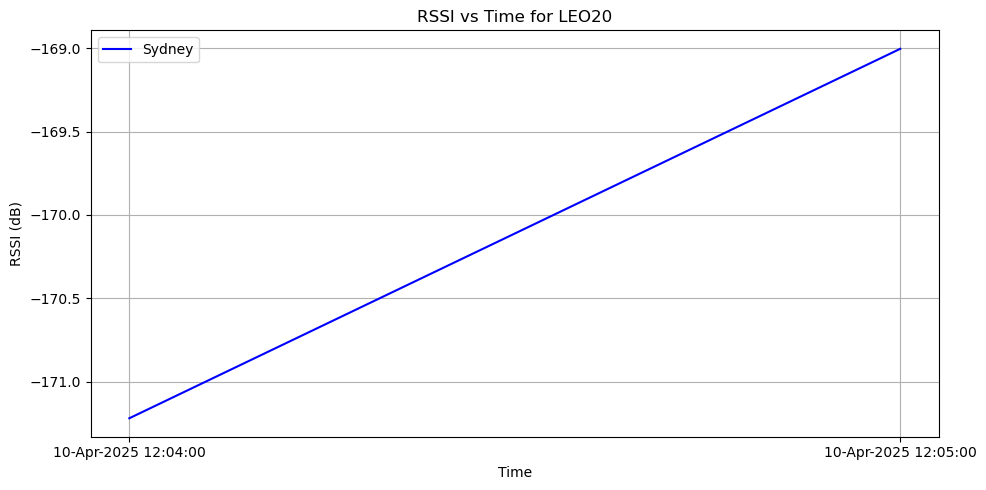

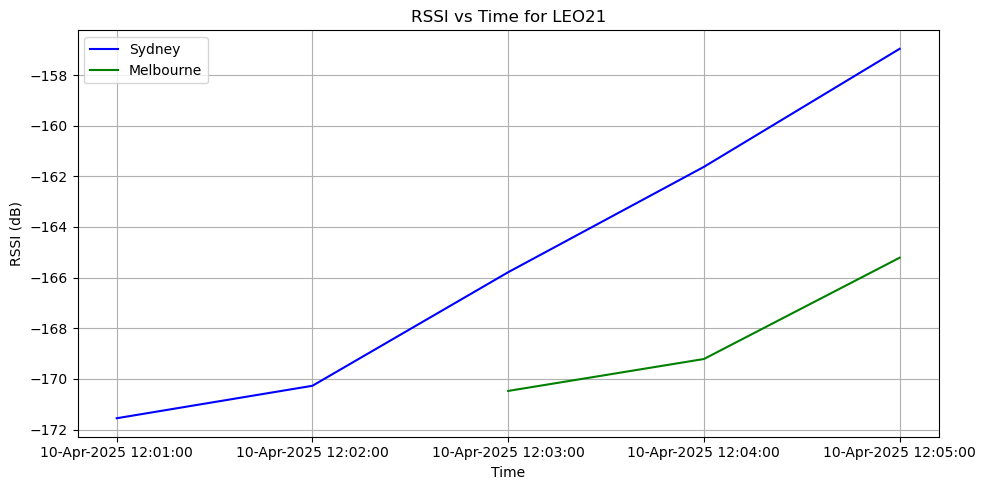

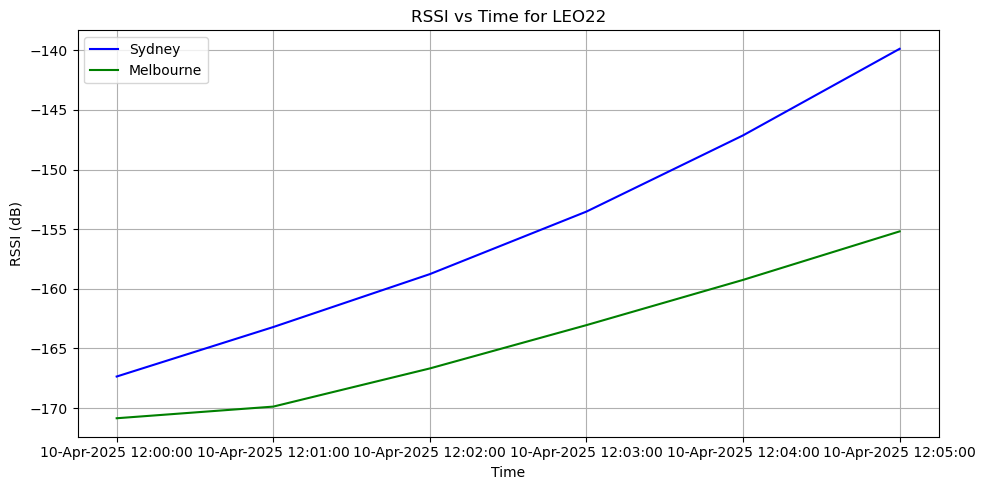

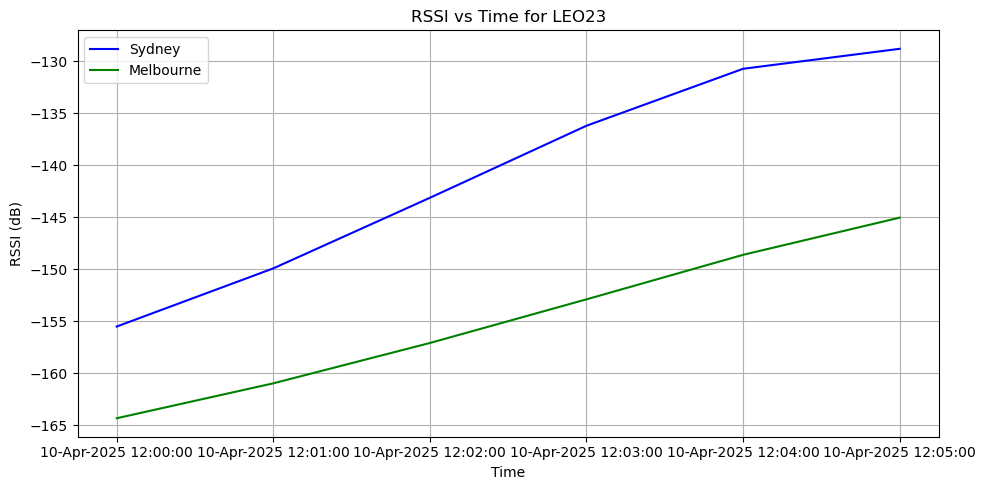

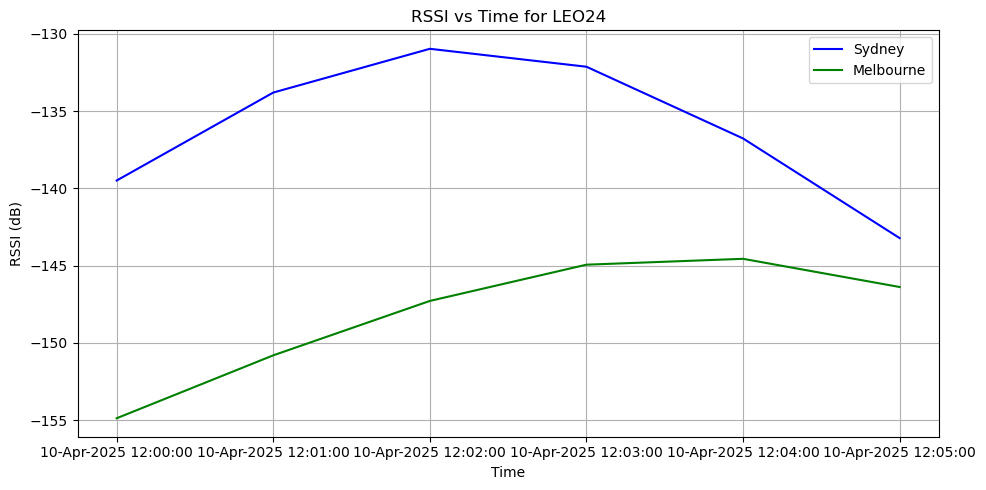

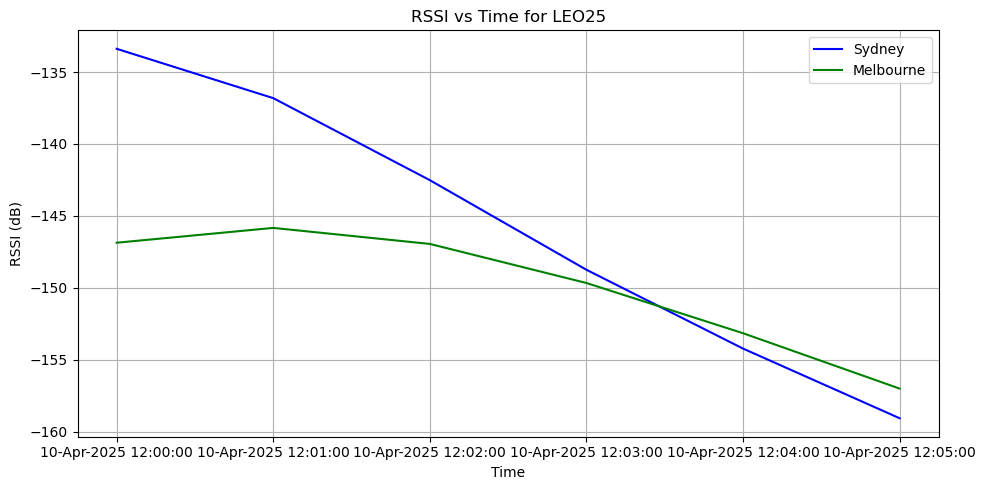

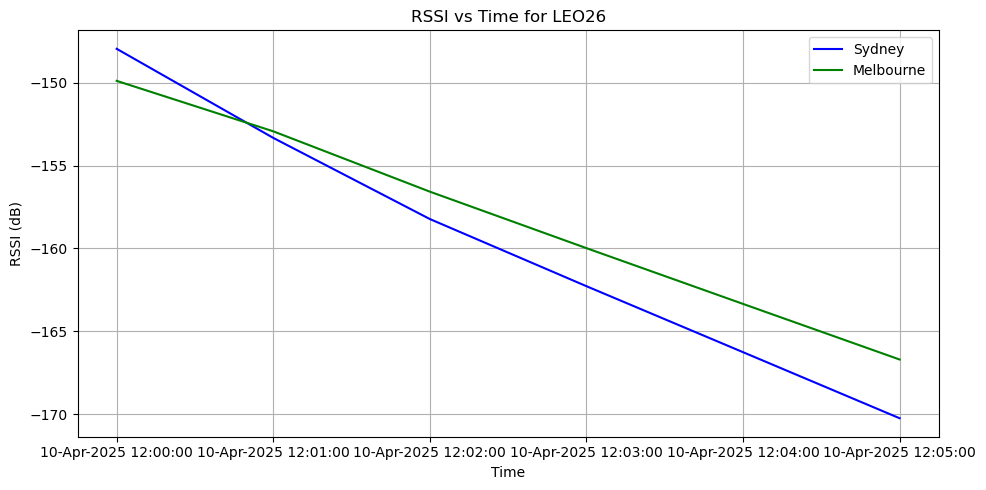

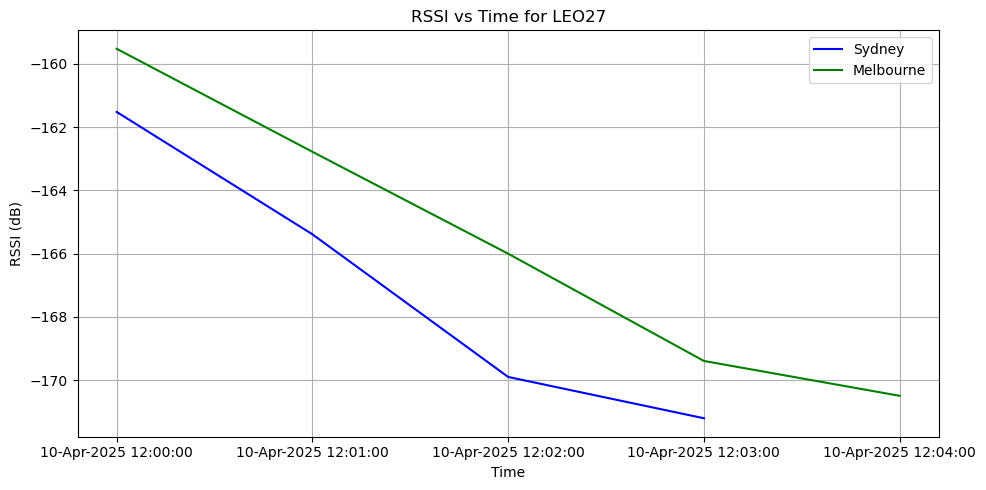

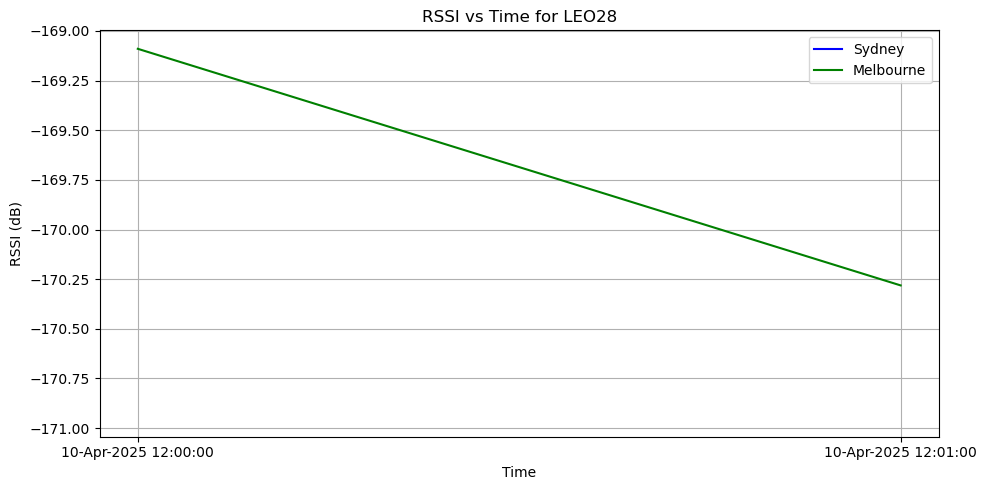

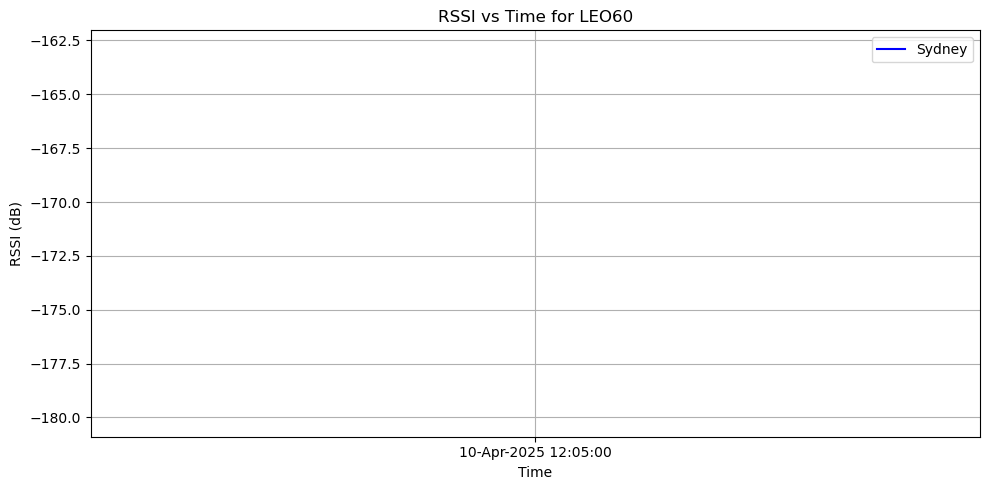

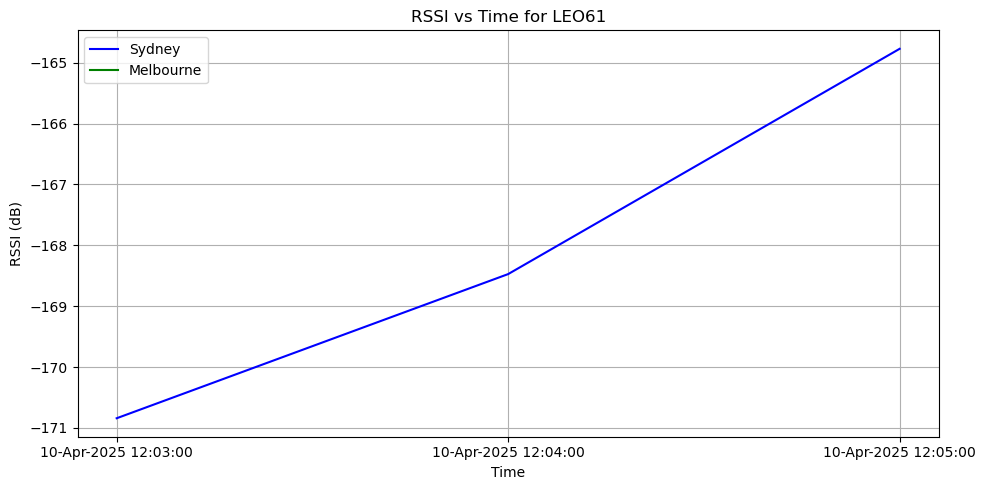

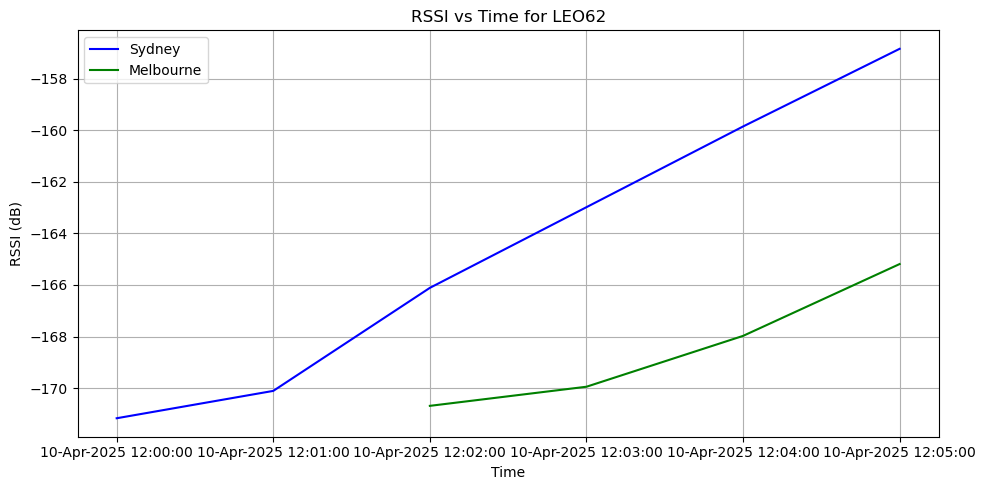

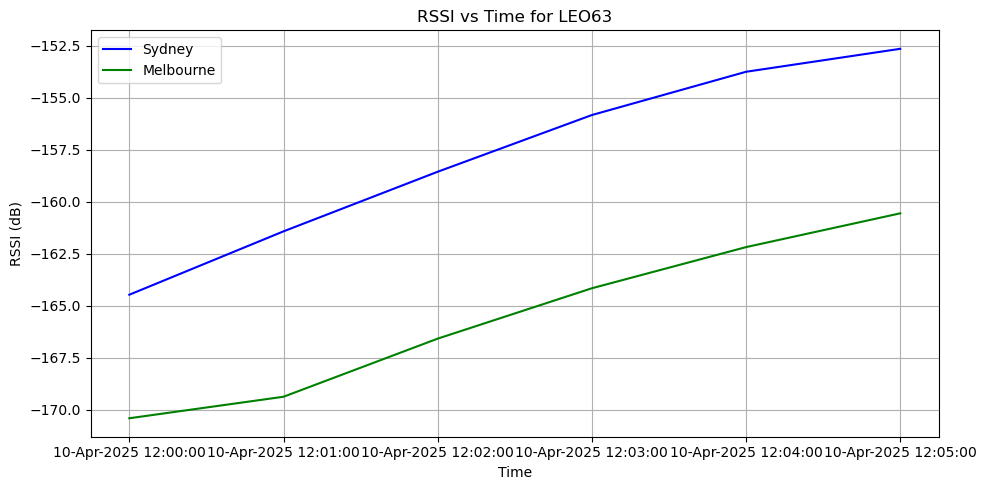

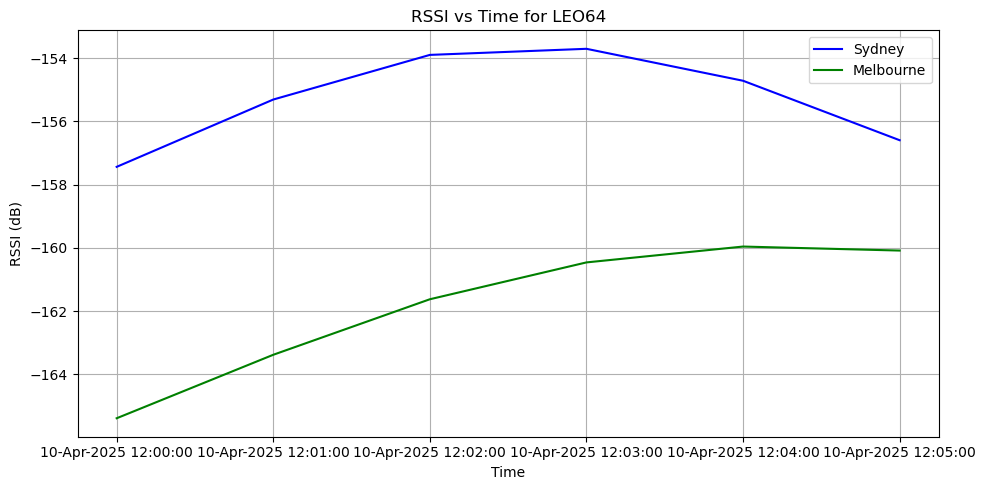

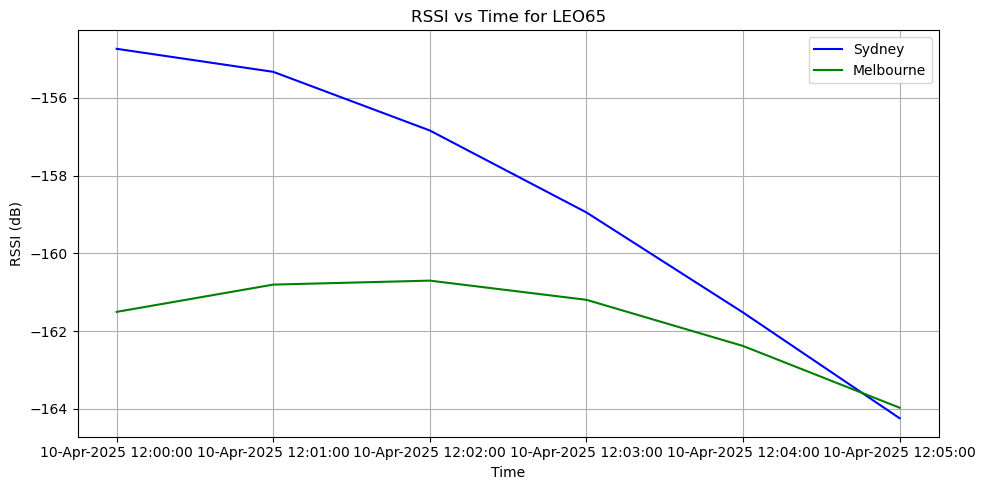

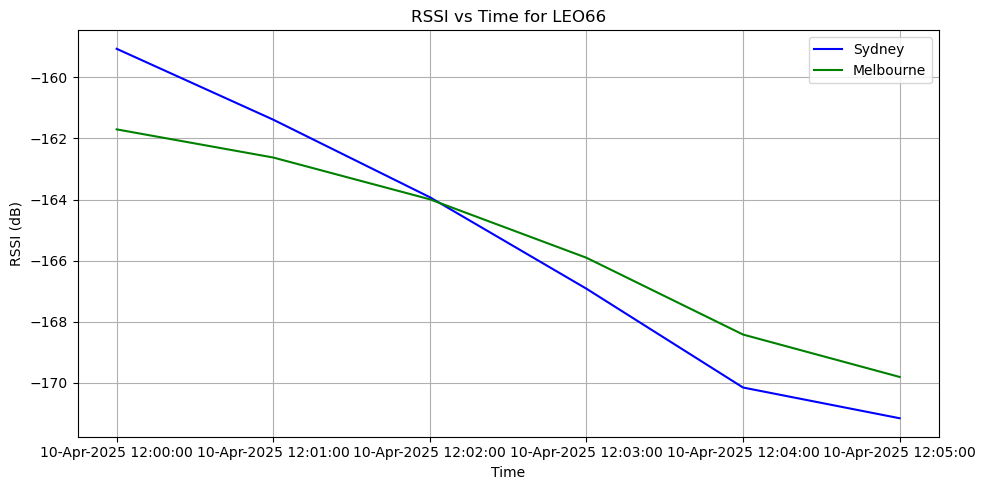

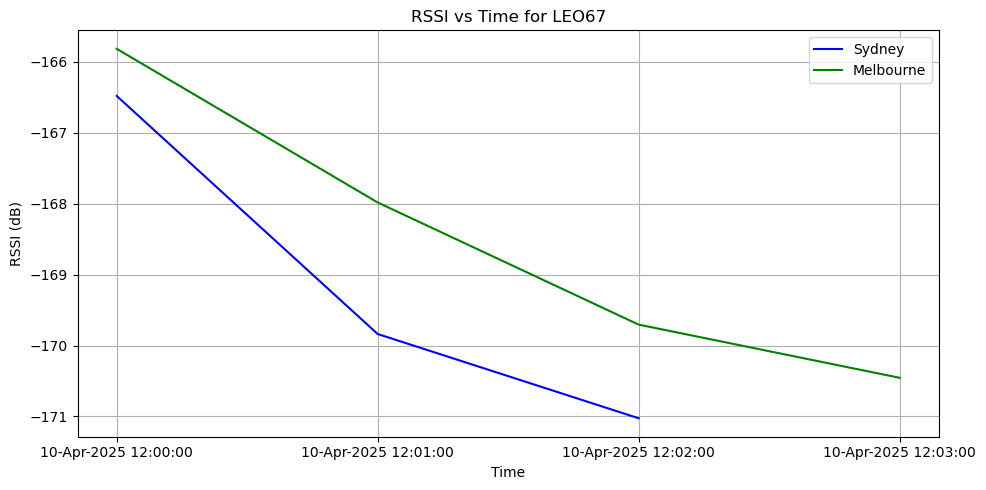

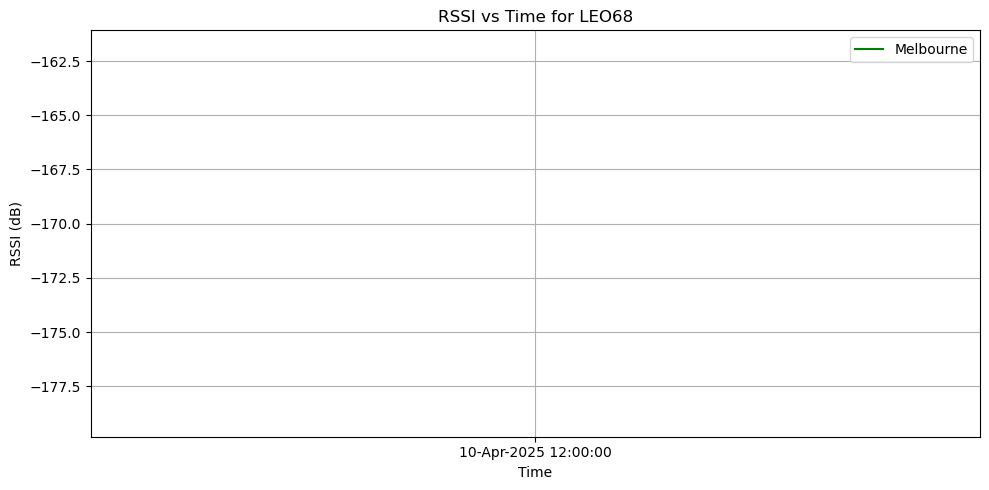

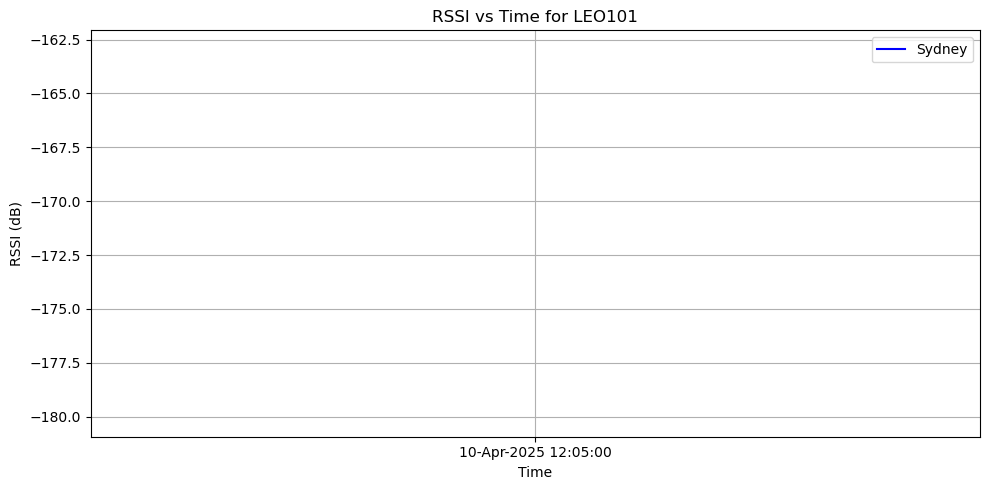

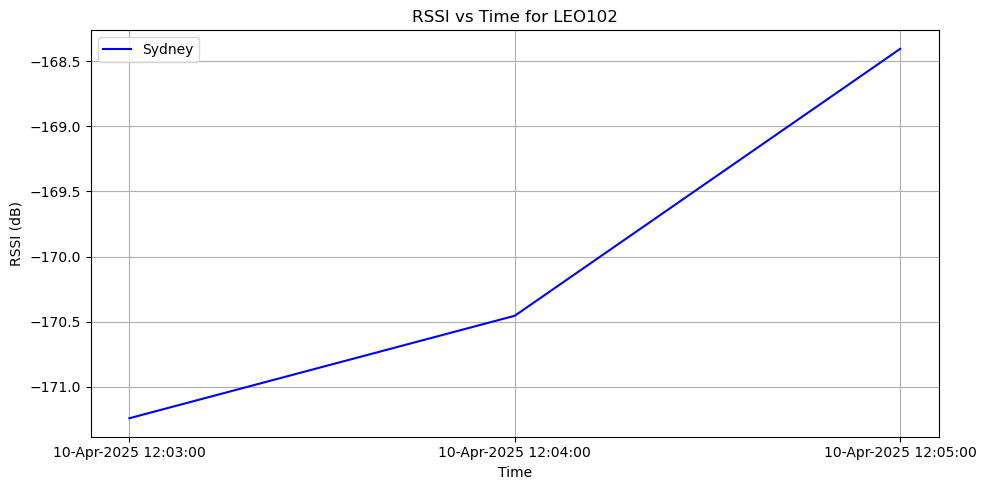

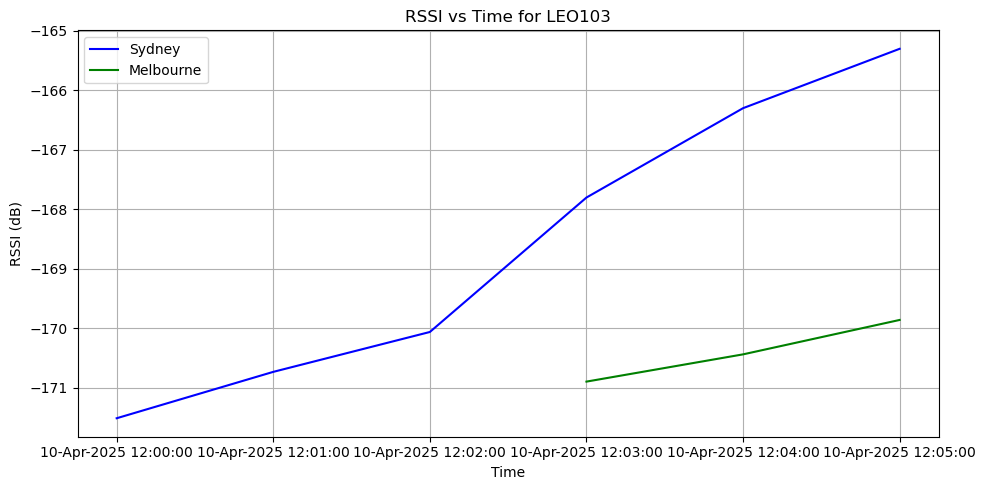

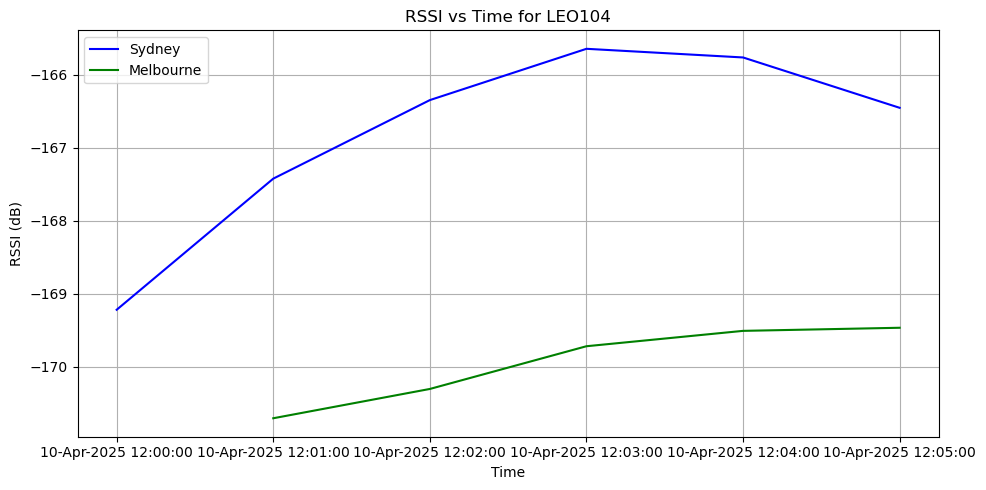

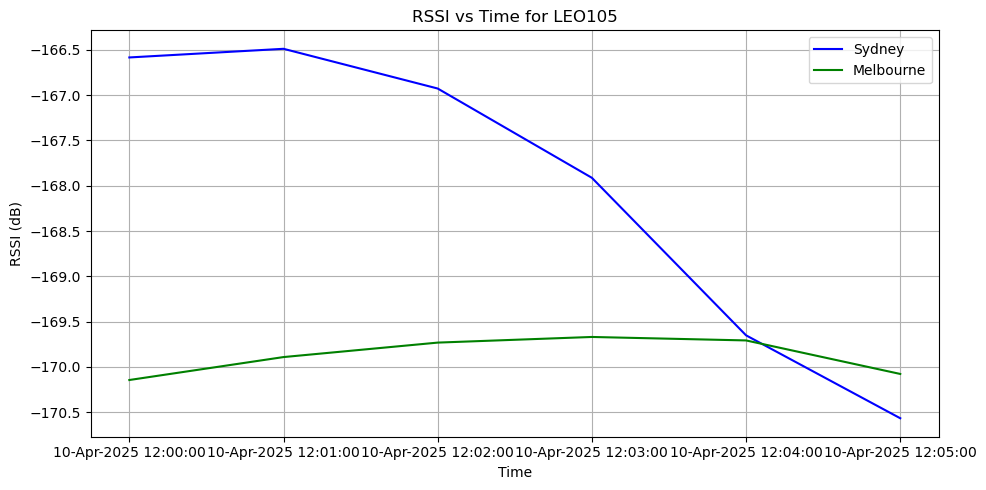

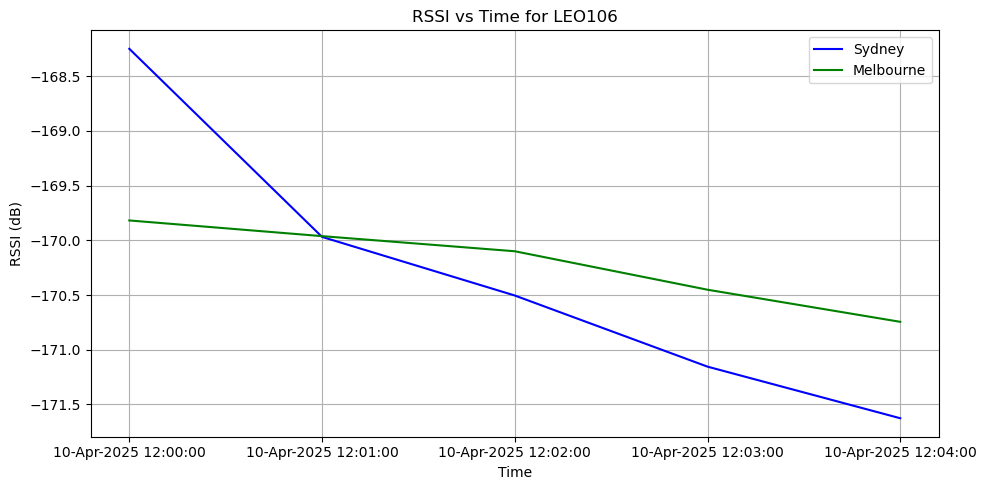

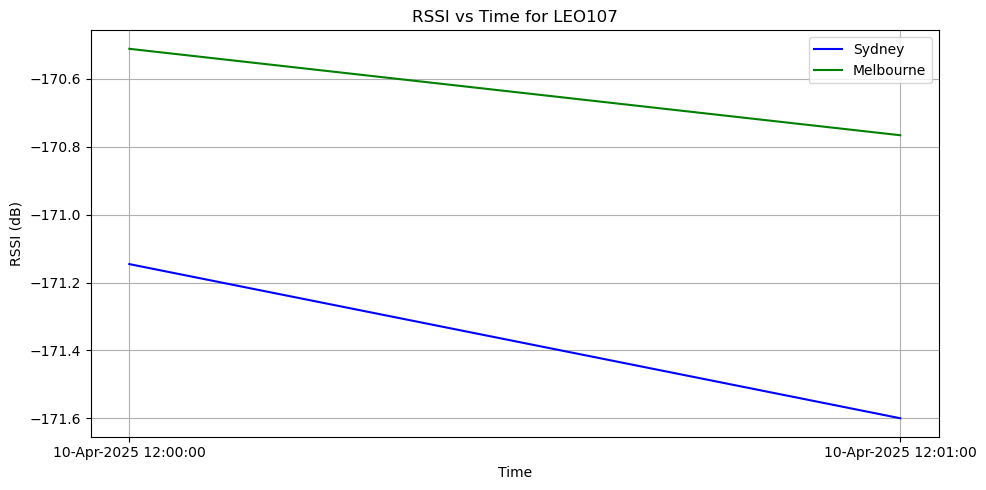

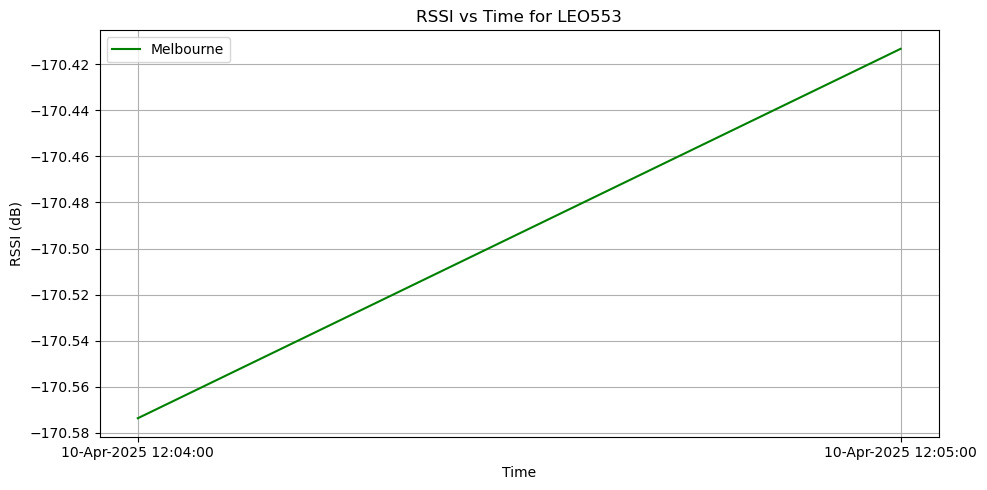

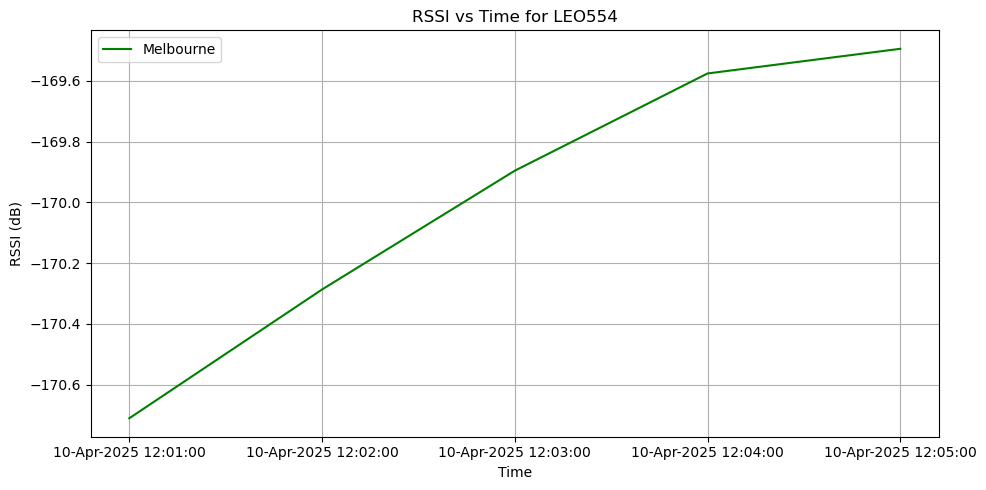

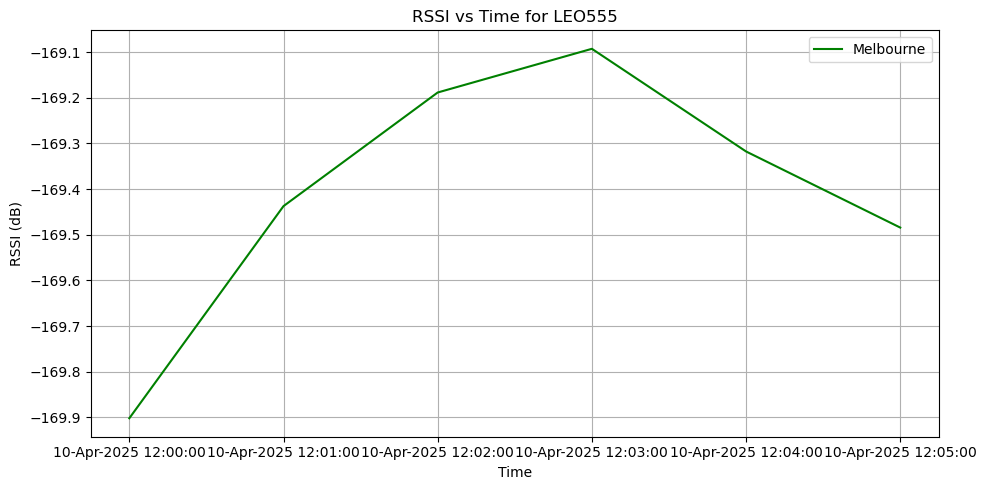

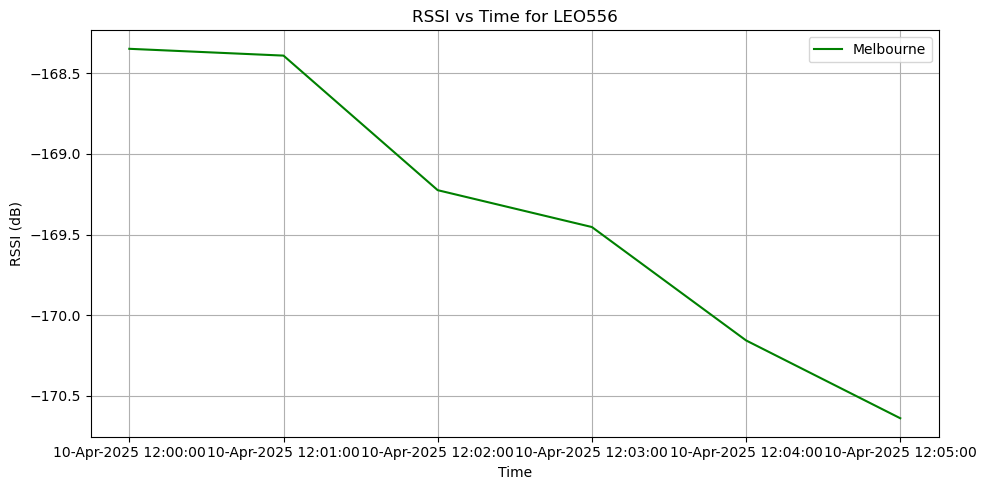

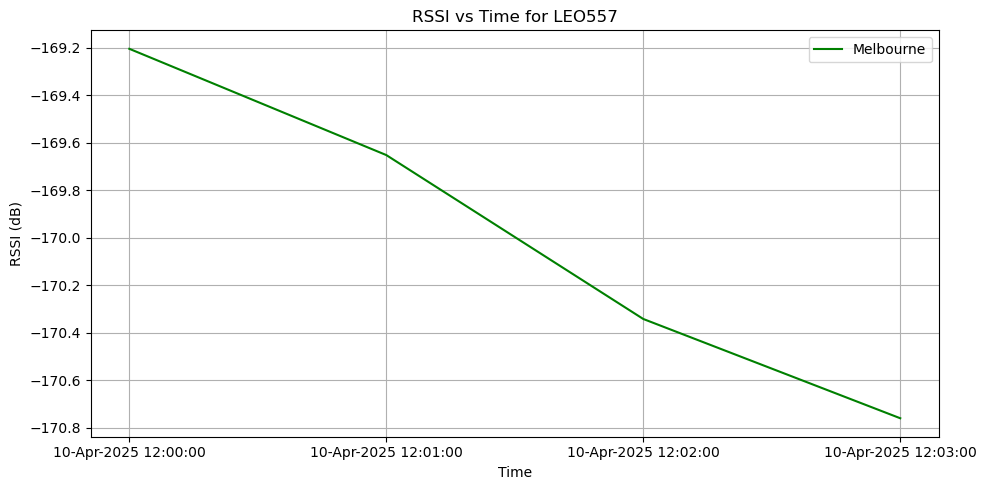

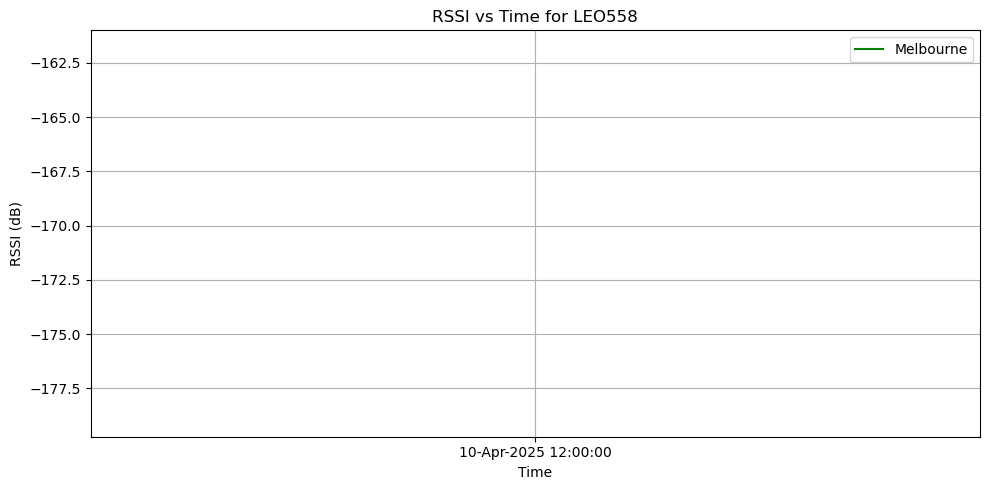

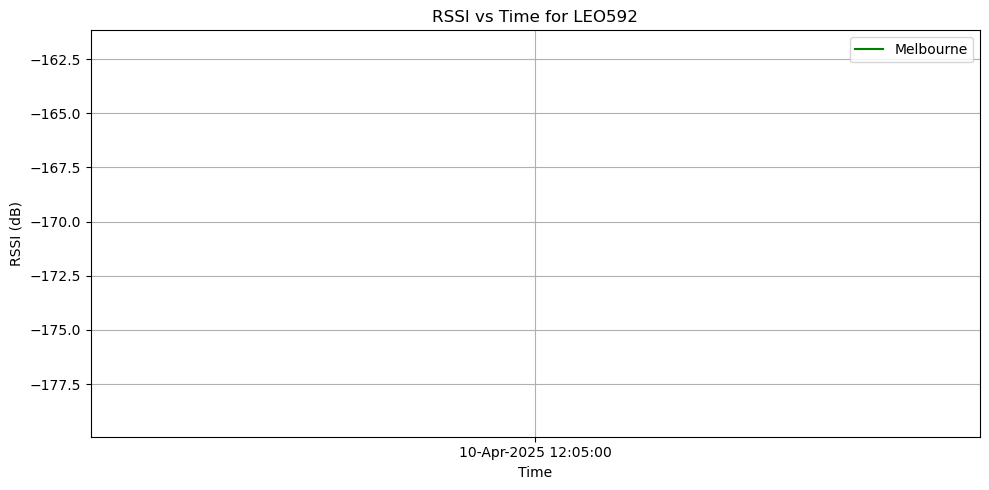

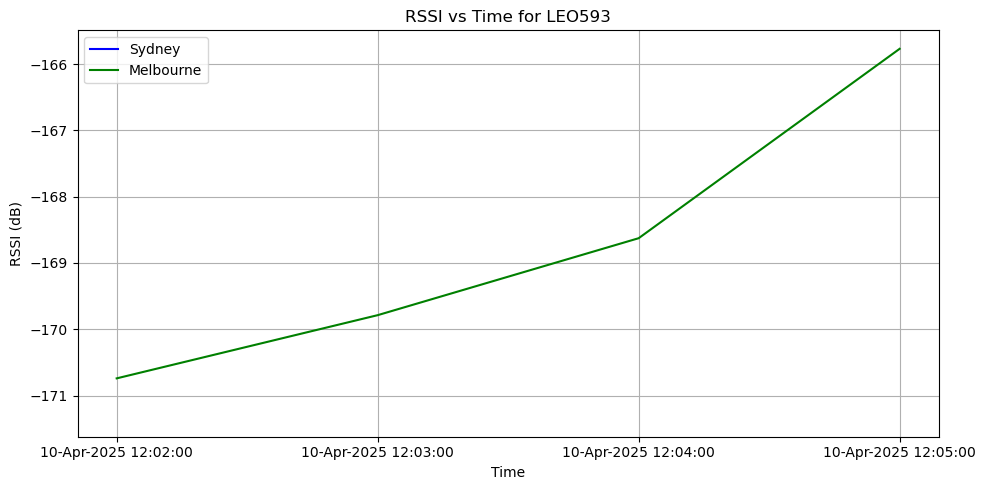

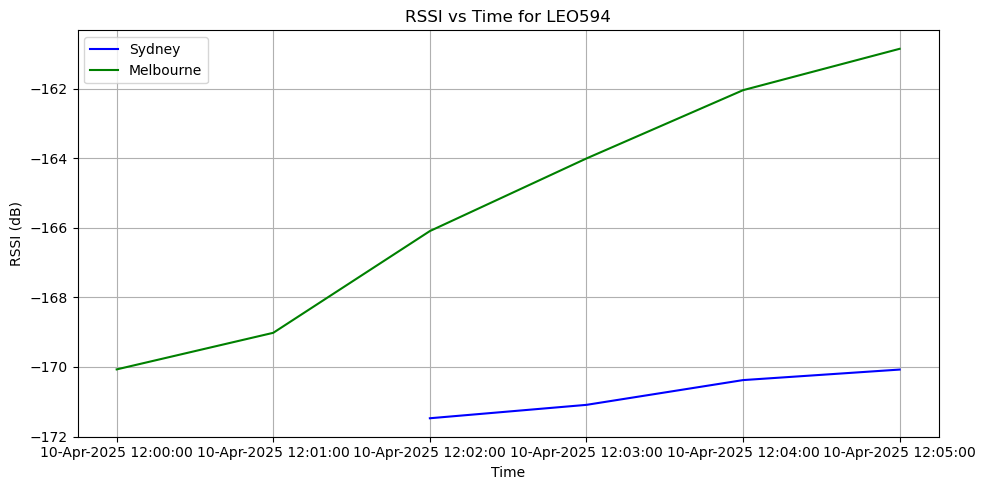

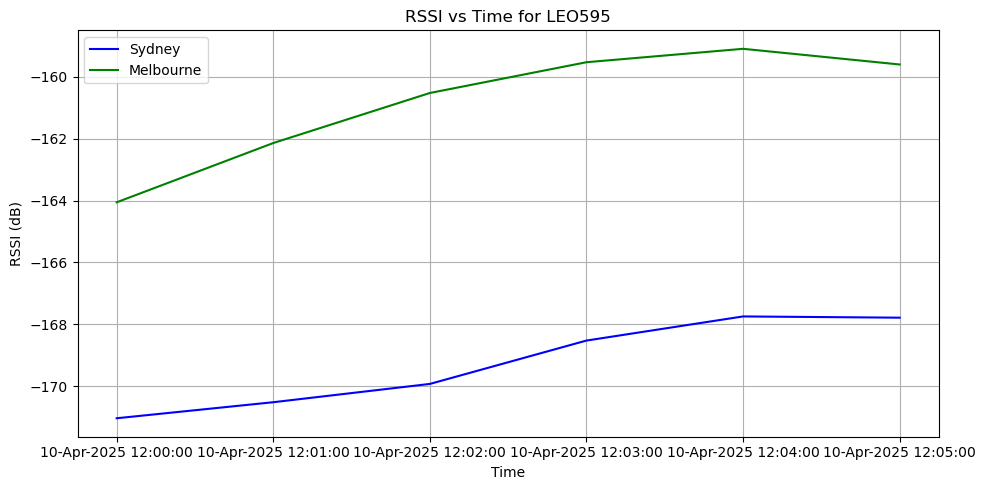

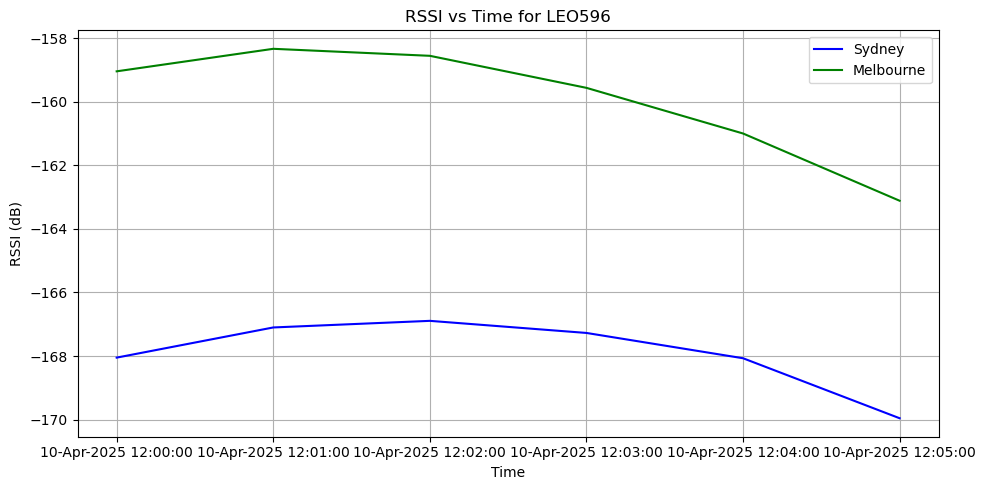

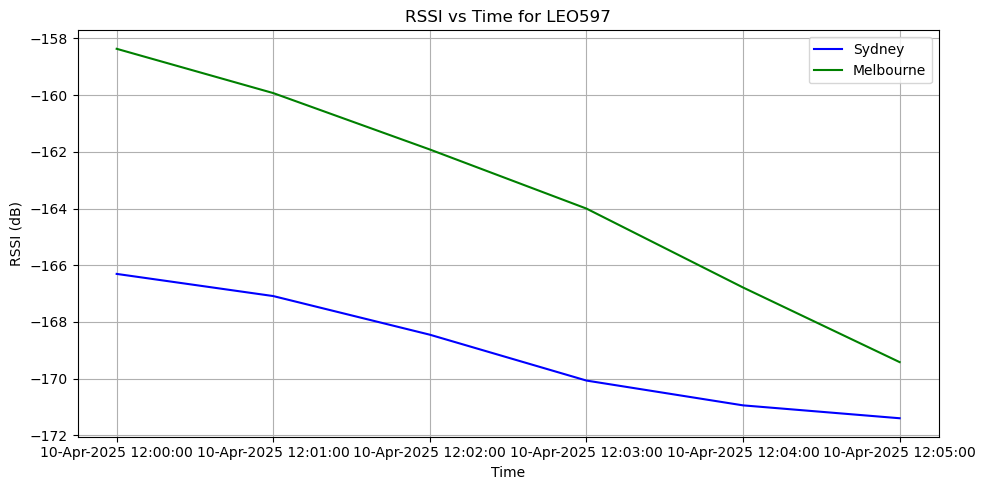

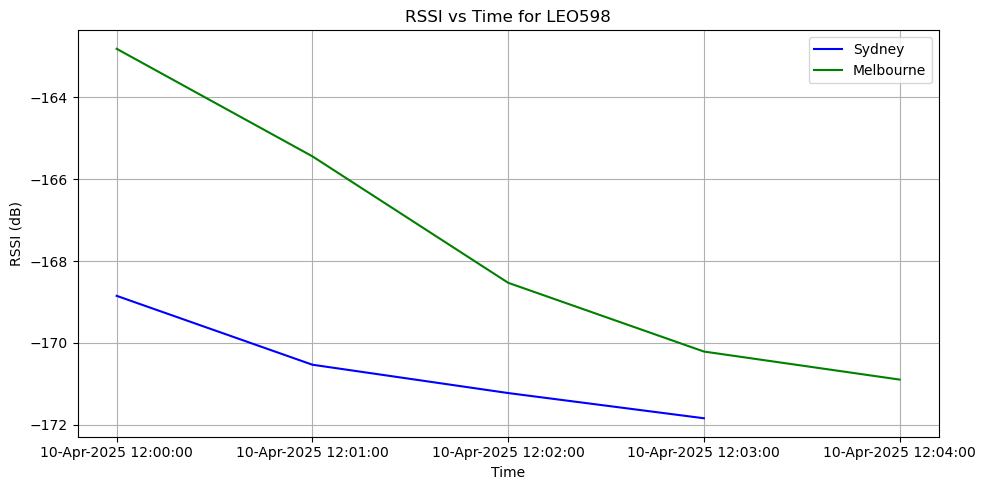

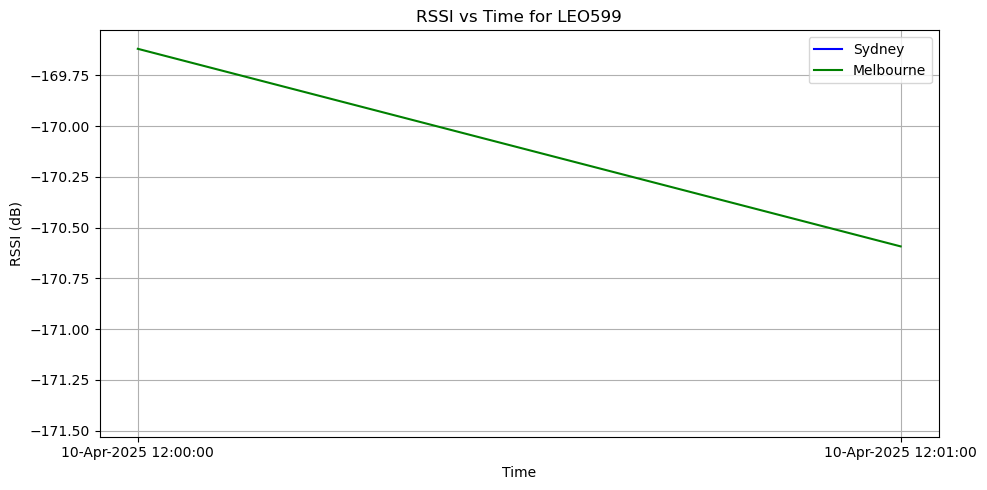

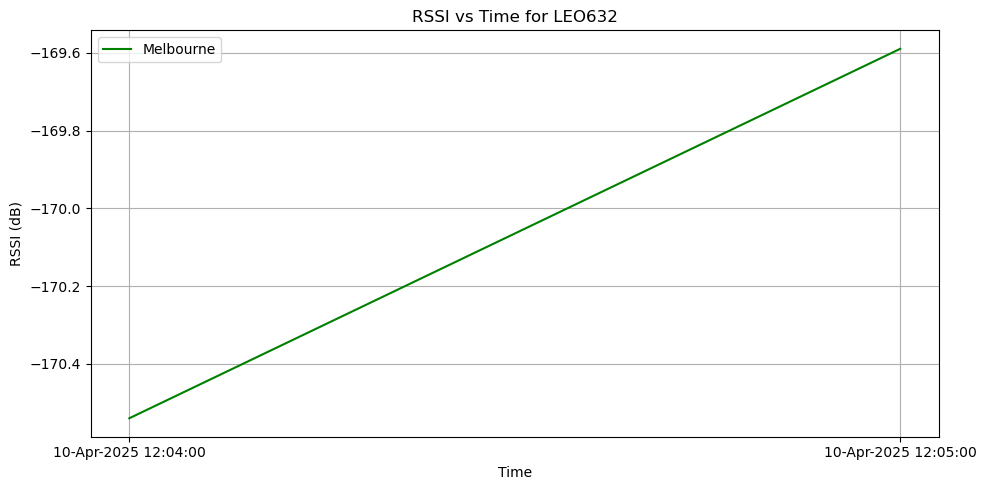

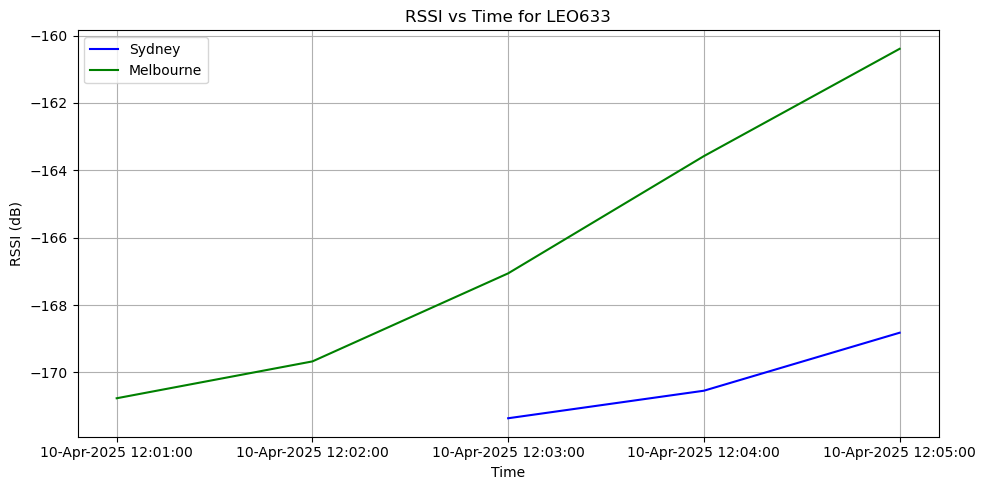

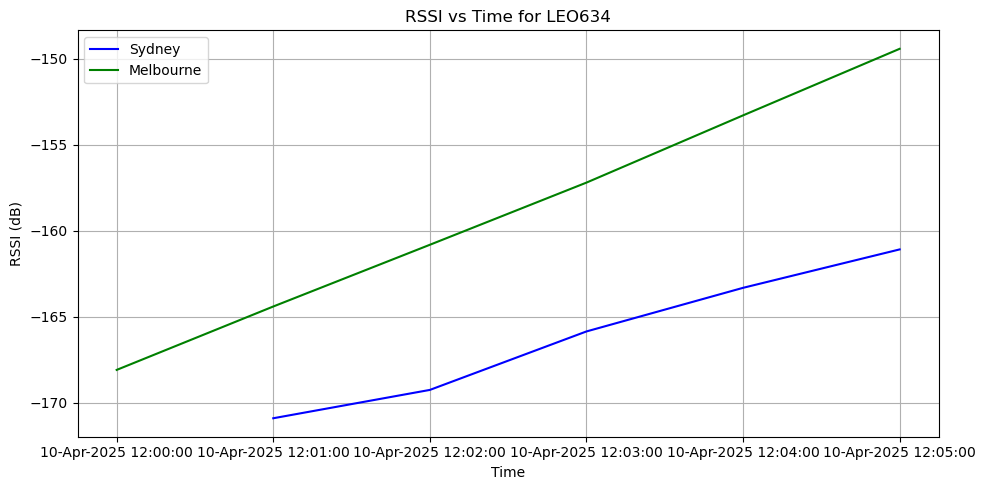

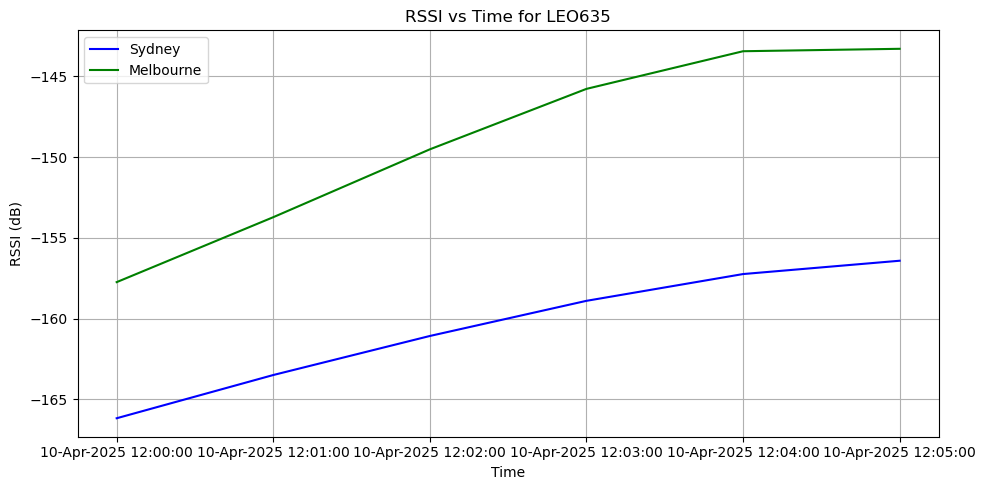

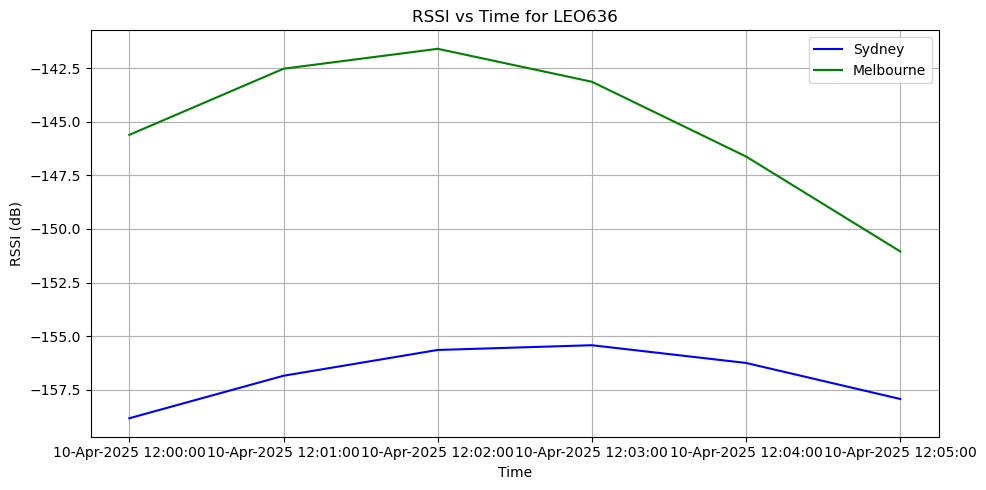

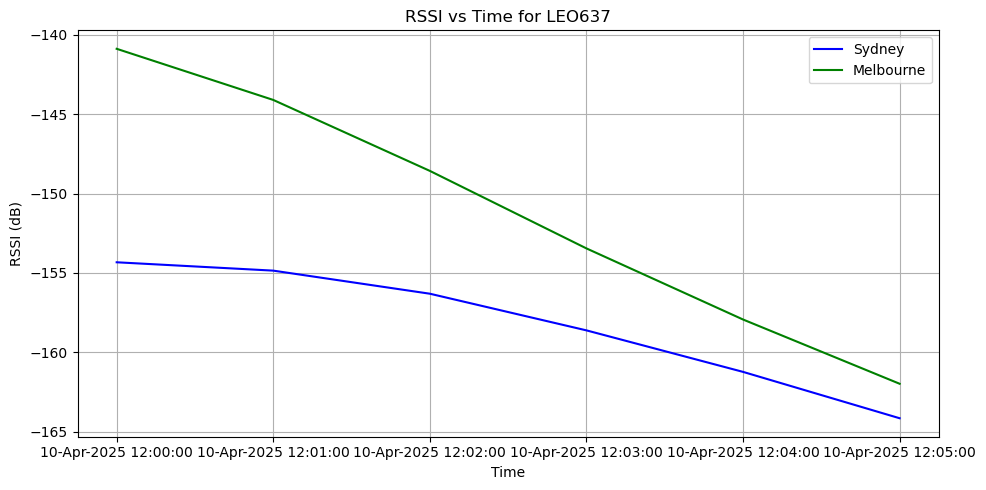

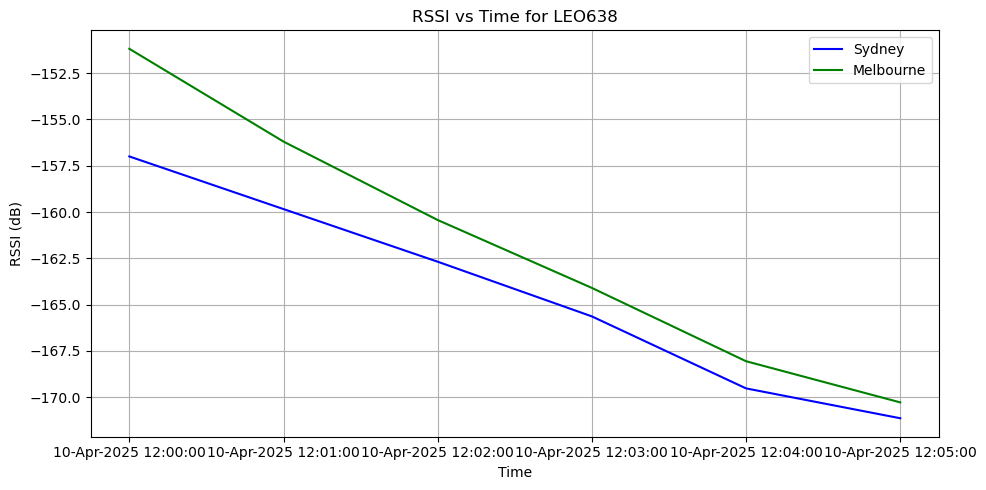

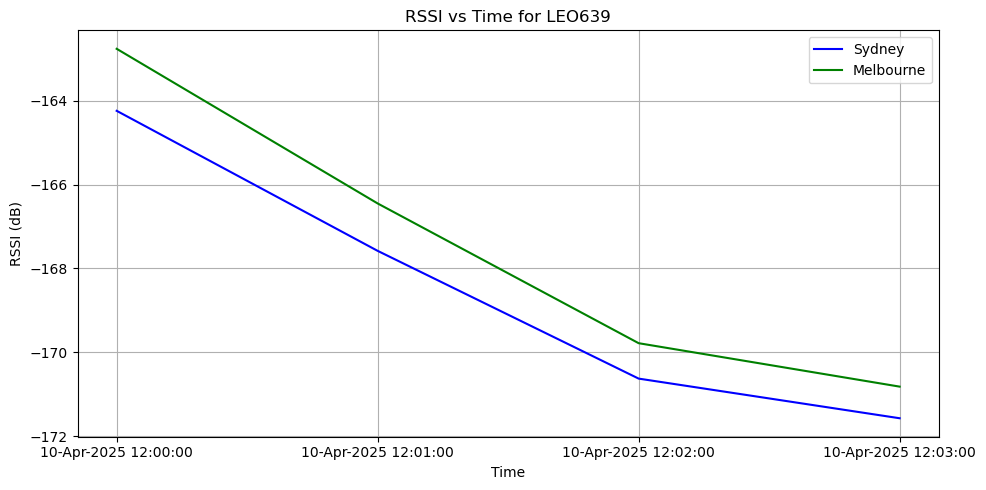

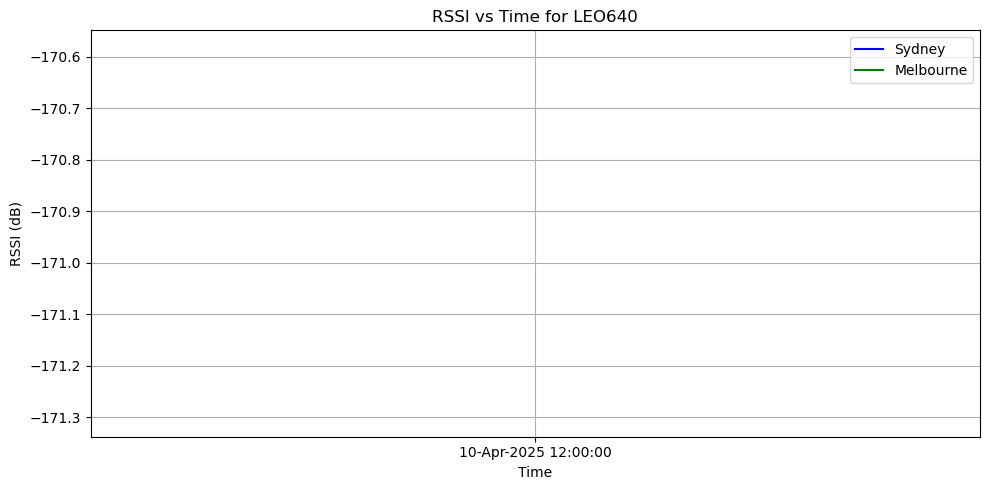

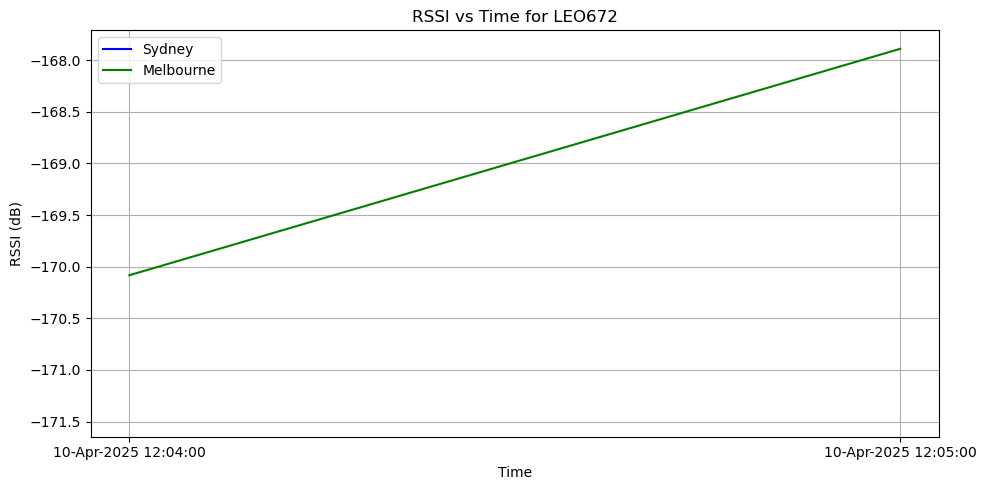

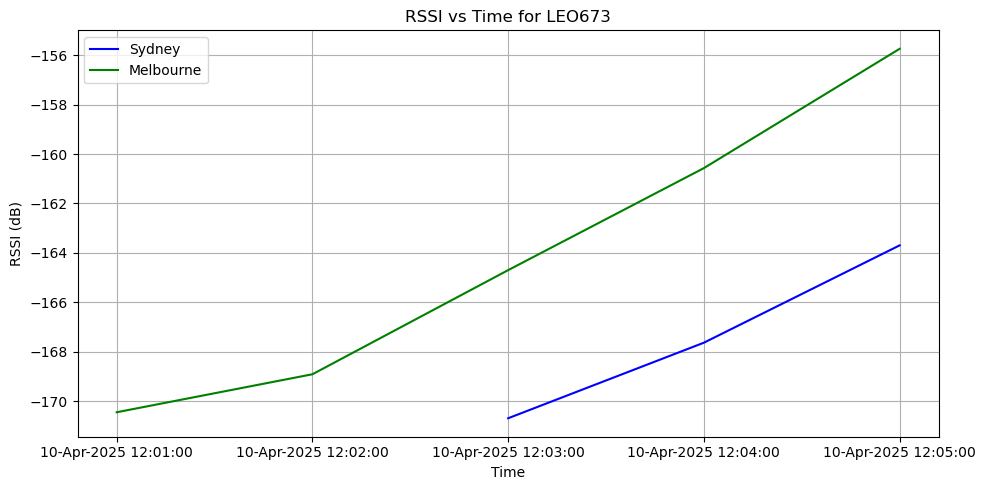

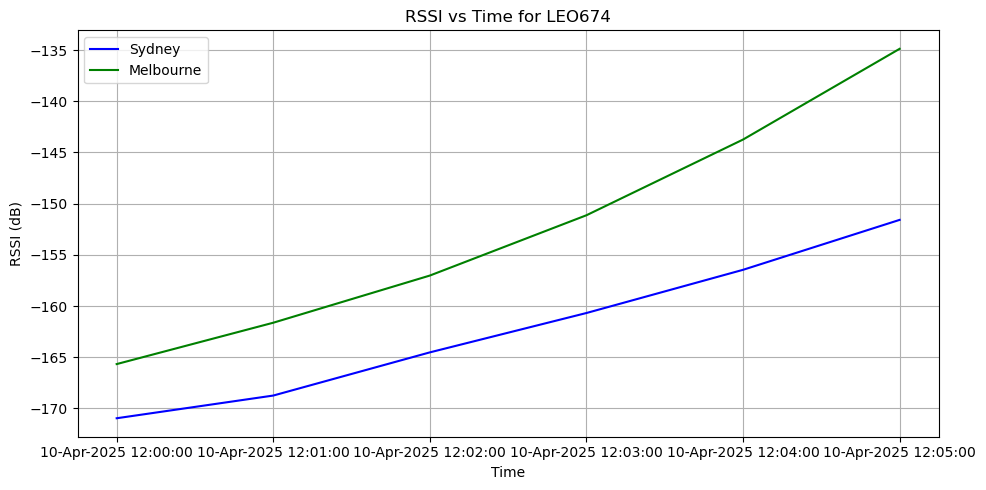

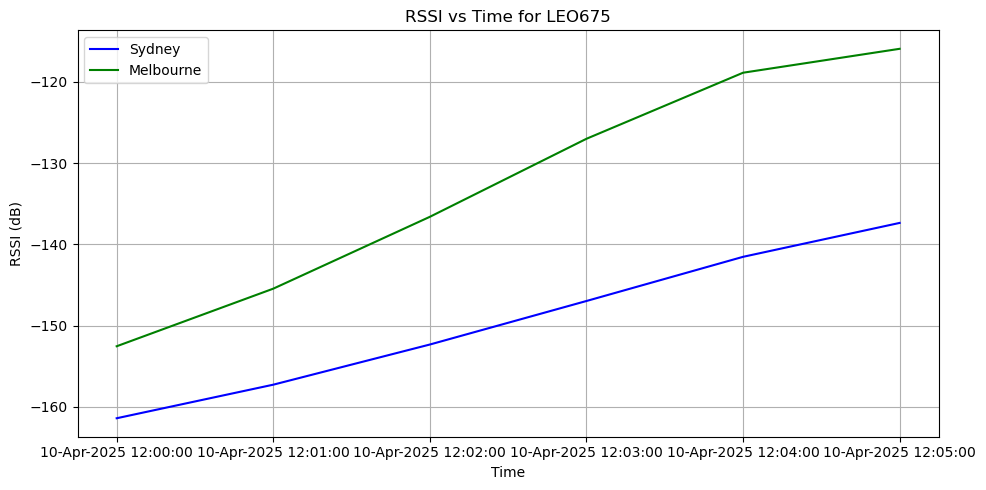

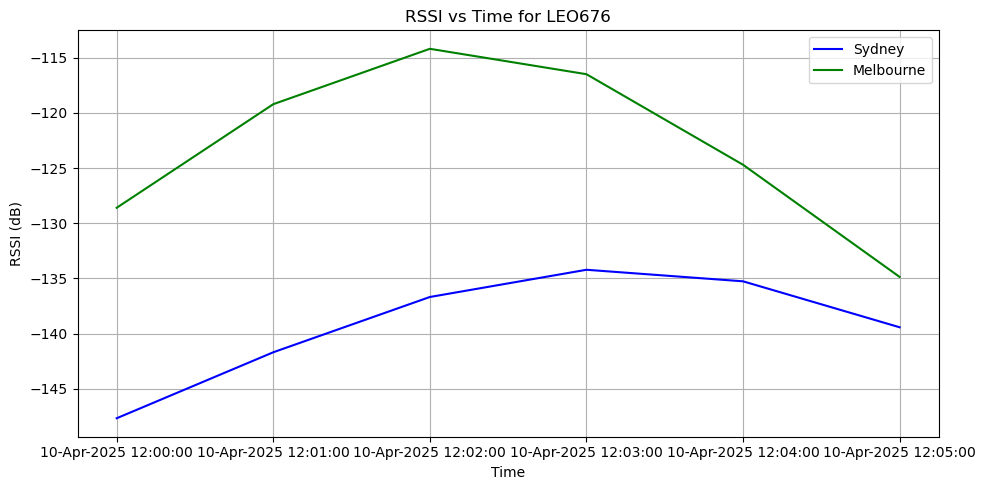

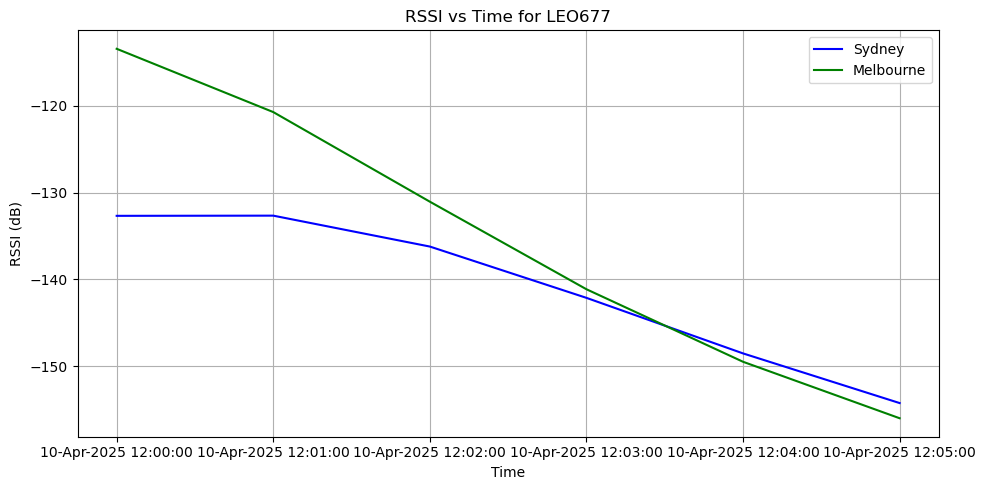

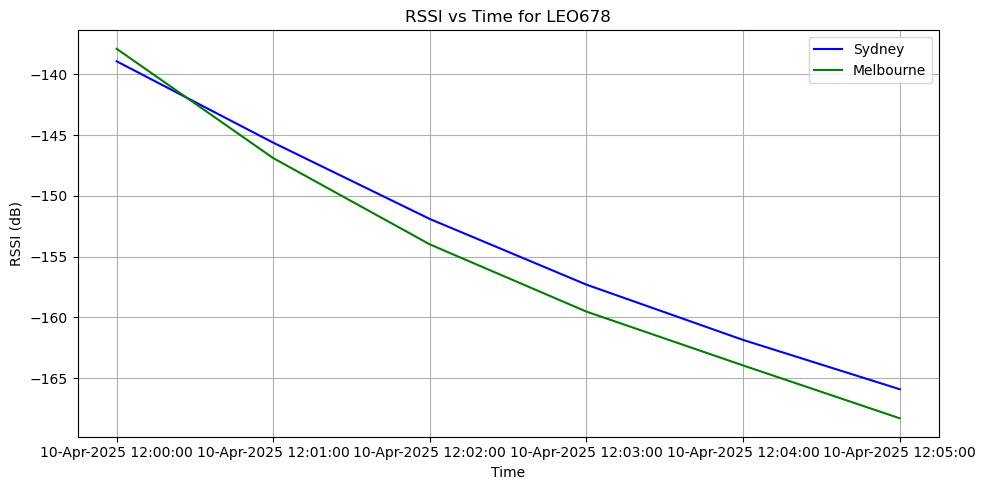

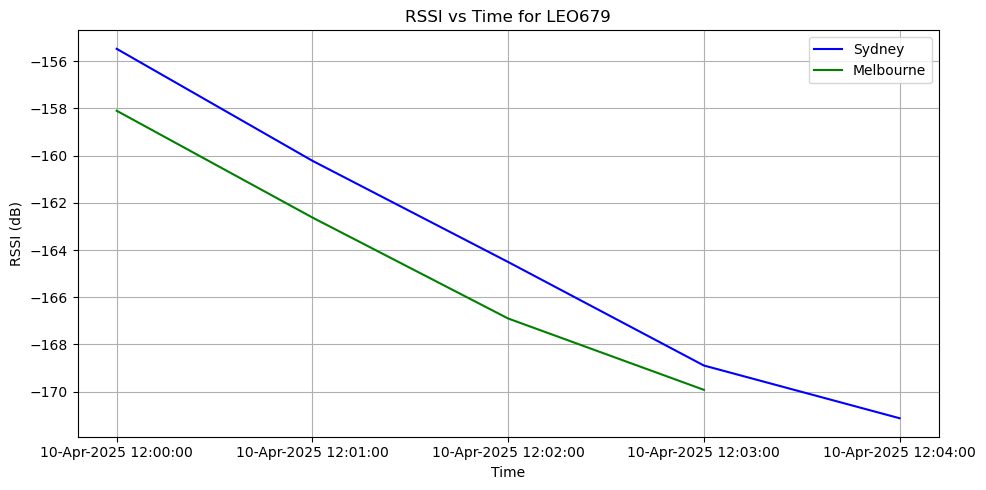

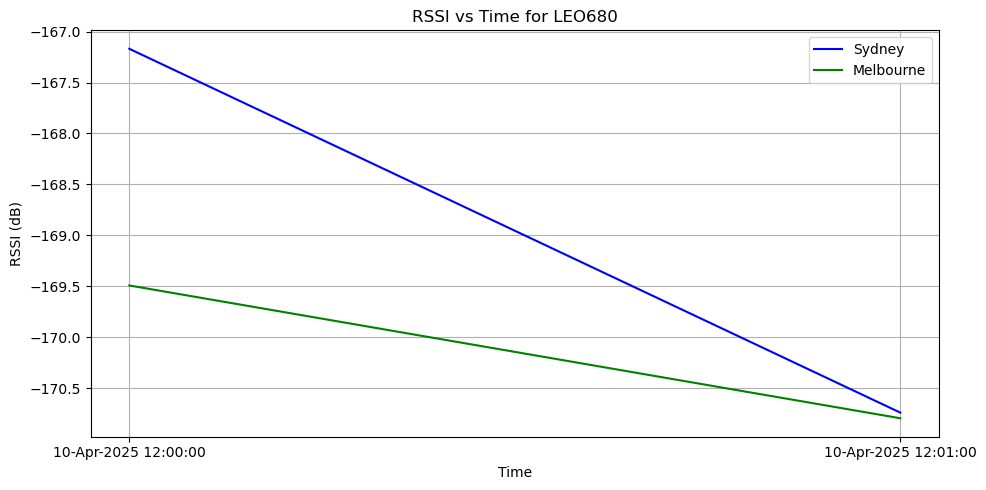

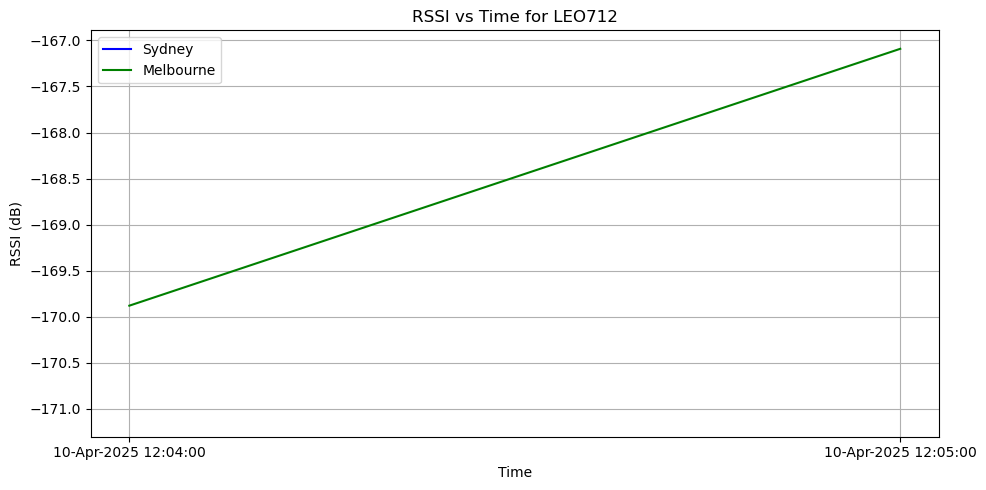

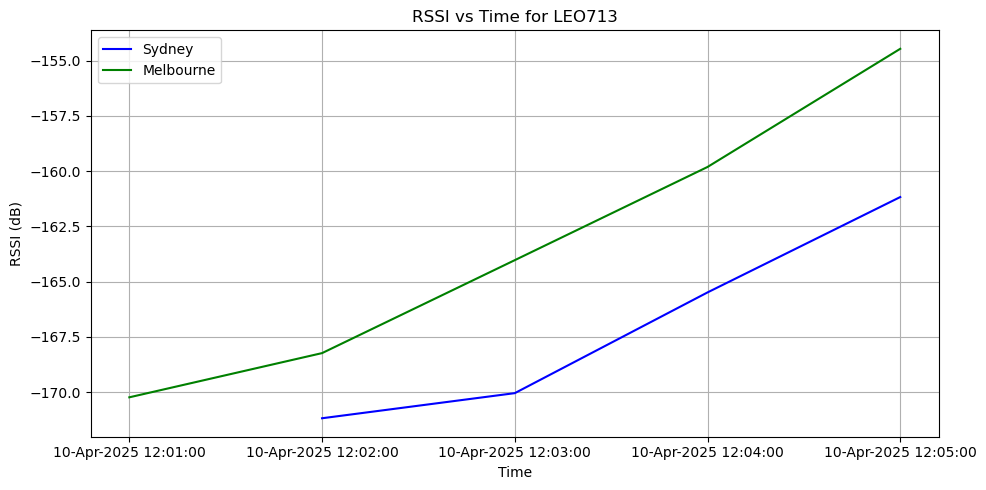

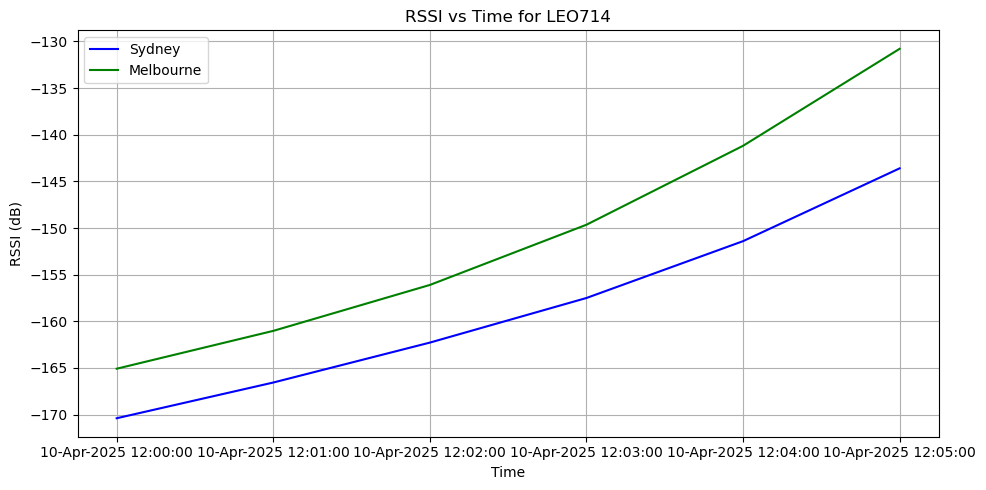

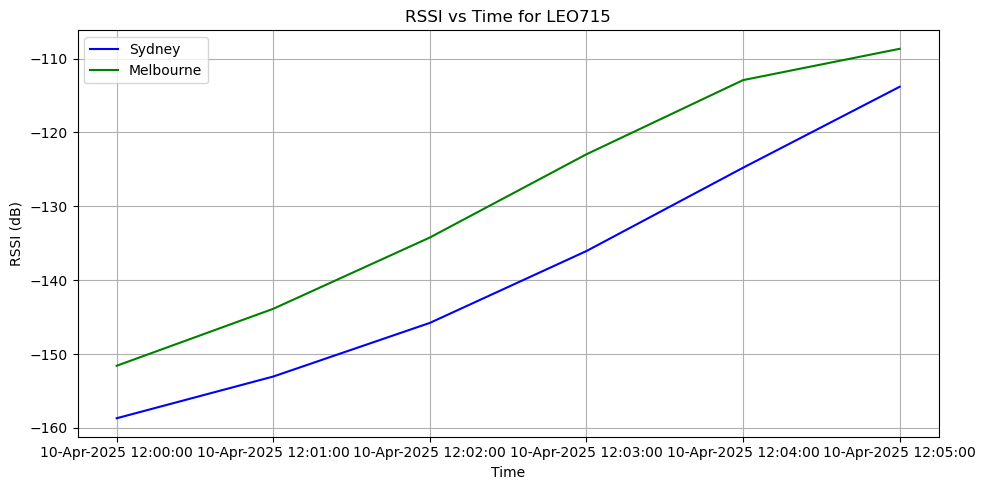

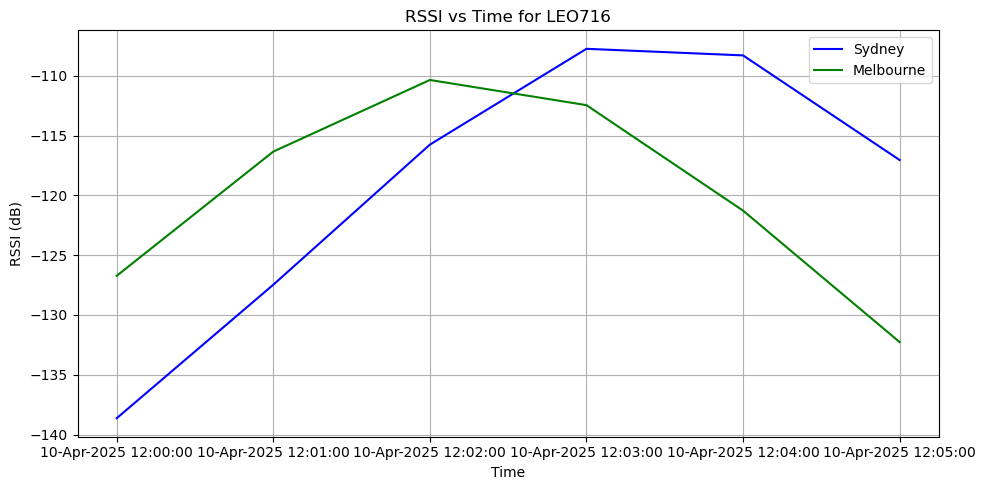

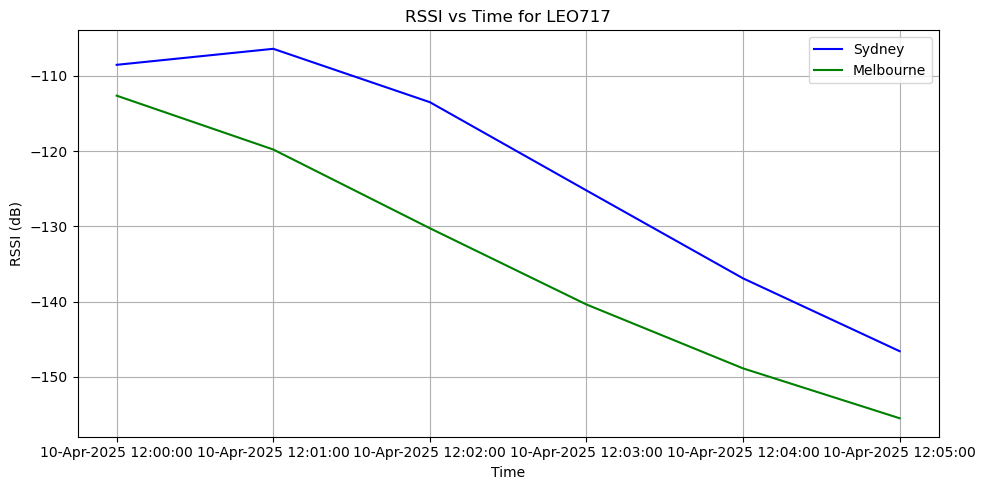

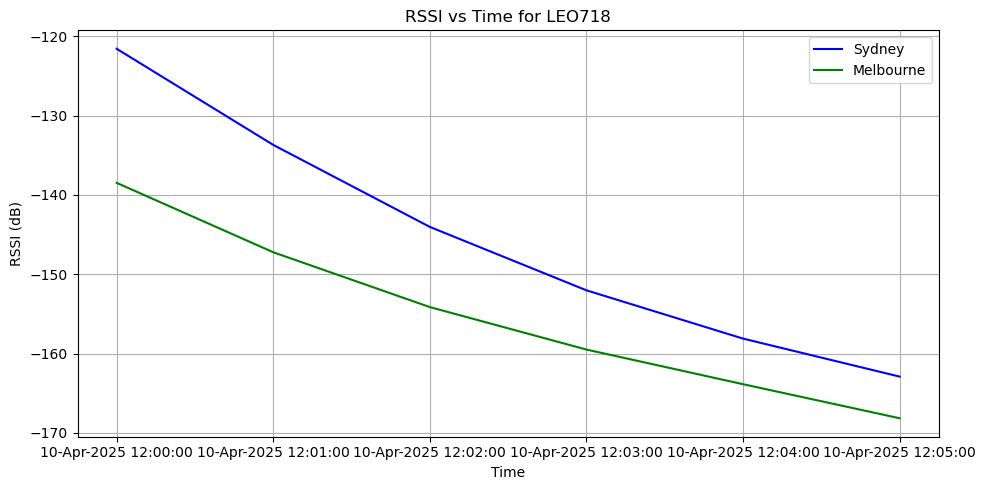

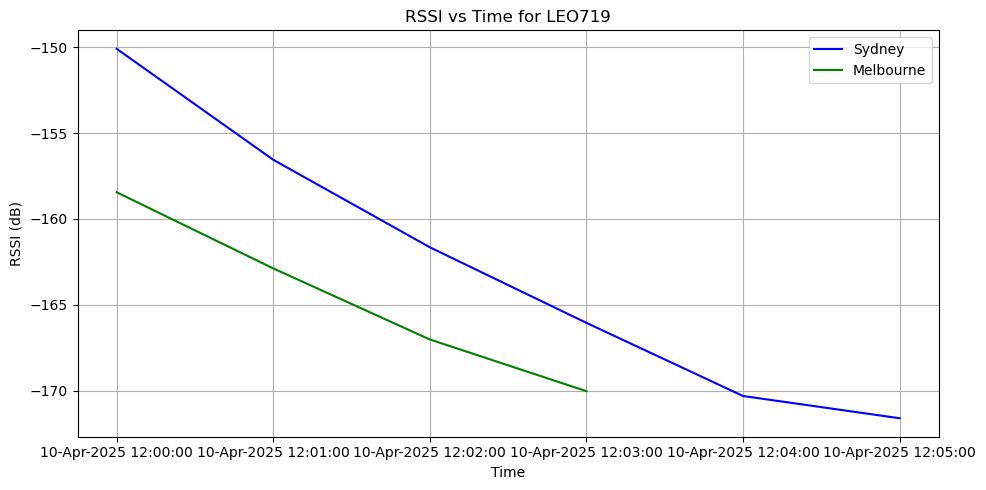

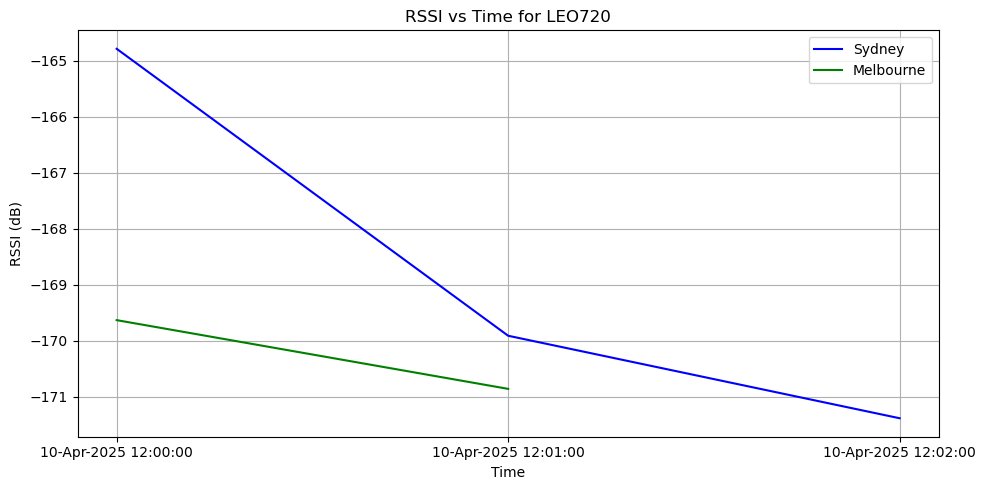

In [98]:
import matplotlib.pyplot as plt
import re

# Loop over each satellite in possible_sat_conn_ids
for sat_id in possible_sat_conn_ids:
    # Build RSSI column names
    sydney_RSSI_col = f'{sat_id}_Sydney_RSSI_dBm'
    melbourne_RSSI_col = f'{sat_id}_Melbourne_RSSI_dBm'

    # Check which RSSI columns exist
    sydney_exists = sydney_RSSI_col in df.columns
    melbourne_exists = melbourne_RSSI_col in df.columns

    # Skip if neither exists
    if not sydney_exists and not melbourne_exists:
        continue

    plt.figure(figsize=(10, 5))
    plt.title(f'RSSI vs Time for {sat_id}')
    plt.xlabel('Time')
    plt.ylabel('RSSI (dB)')

    if sydney_exists:
        plt.plot(df['Time'], df[sydney_RSSI_col], label='Sydney', color='blue')
    if melbourne_exists:
        plt.plot(df['Time'], df[melbourne_RSSI_col], label='Melbourne', color='green')

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import re

# Loop over each satellite in possible_sat_conn_ids
for sat_id in possible_sat_conn_ids:
    # Build SNR column names
    sydney_snr_col = f'{sat_id}_Sydney_SNR_dB'
    melbourne_snr_col = f'{sat_id}_Melbourne_SNR_dB'

    # Check which SNR columns exist
    sydney_exists = sydney_snr_col in df.columns
    melbourne_exists = melbourne_snr_col in df.columns

    # Skip if neither exists
    if not sydney_exists and not melbourne_exists:
        continue

    plt.figure(figsize=(10, 5))
    plt.title(f'SNR vs Time for {sat_id}')
    plt.xlabel('Time')
    plt.ylabel('SNR (dB)')

    if sydney_exists:
        plt.plot(df['Time'], df[sydney_snr_col], label='Sydney', color='blue')
    if melbourne_exists:
        plt.plot(df['Time'], df[melbourne_snr_col], label='Melbourne', color='green')

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
